In [1]:
import sys

In [2]:
sys.version_info

sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)

# Club Mahindra DataOlympics

## Problem Statement
### Food & Beverages Spend Prediction in Club Mahindra Resorts
Club Mahindra (Club M) makes significant revenue from Food and Beverages (F&B) sales in their resorts. The members of Club M are offered a wide variety of items in either buffet or À la carte form. Following are some benefits that the model to predict the spend by a member in their next visit to a resort will bring:
1. Predicting the F&B spend of a member in a resort would help in improving the pre-sales during resort booking through web and mobile app
2. Targeted campaigns to suit the member taste and preference of F&B
3. Providing members in the resort with a customized experience and offers
4. Help resort kitchen to plan the inventory and food quantity to be prepared in advance
Given the information related to resort, club member, reservation etc. the task is to predict average spend per room night on food and beverages for the each reservation in the test set.

# Read Data

In [3]:
import pandas as pd
import numpy as np

train_df = pd.read_csv("train.csv")
test_df =pd.read_csv("test.csv")

#date formating
train_df[["booking_date","checkin_date","checkout_date"]] = train_df[["booking_date","checkin_date","checkout_date"]].apply(pd.to_datetime, format="%d/%m/%y")
test_df[["booking_date","checkin_date","checkout_date"]] = test_df[["booking_date","checkin_date","checkout_date"]].apply(pd.to_datetime, format="%d/%m/%y")

In [4]:
# first 5 rows of train
train_df.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,2018-04-05,2018-04-05,2018-04-06,3,1,2,0,46,3,...,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,2015-01-23,2015-04-11,2015-04-16,1,1,2,0,46,3,...,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,2015-01-28,2015-02-01,2015-02-05,1,1,2,0,47,1,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,2015-05-02,2015-06-11,2015-06-16,1,1,2,2,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,2015-09-02,2015-12-14,2015-12-19,1,1,2,0,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


In [5]:
# last 5 rows of train
train_df.tail()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
341419,a804d59b74b1d532a90740ded80dd05873bbef125bc349...,2019-02-11,2019-02-27,2019-03-01,2,2,4,0,47,1,...,8.0,1,2,I,1,0095e00c6dae789d37628bd85697e53c423231337994c4...,E,A,c6f3ac57944a531490cd39902d0f777715fd005efac9a3...,5.918087
341420,7062c92a631731e7189cf3dddb20aceeae91a883e14229...,2019-02-27,2019-02-28,2019-03-01,2,4,2,0,45,1,...,10.0,1,2,D,1,42d7b97ad0d345da57a4010157729286418481f3d7ad24...,E,A,c75cb66ae28d8ebc6eded002c28a8ba0d06d3a78c6b5cb...,8.186771
341421,18a5668c302c321dc2d42a48923ceff97af633c66d72ee...,2019-02-27,2019-02-27,2019-02-28,3,3,3,0,45,1,...,10.0,4,3,H,1,f393011a27daf3d1676417f48f44ad9ed3541285e71209...,F,A,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,8.381939
341422,1cbe1611a122023d7e994b4cf51fcf28ce44acdbcabbfb...,2019-02-27,2019-02-28,2019-03-01,1,3,5,0,47,2,...,8.0,2,3,B,1,b14649c29eb050f4e9b69c7a3afb5dfa00d12dabfd2e40...,D,A,6208ef0f7750c111548cf90b6ea1d0d0a66f6bff40dbef...,8.856035
341423,8712dd3ce2e36f2fbcd16b24aa3b89bd1c5203a39e578b...,2019-02-28,2019-03-01,2019-03-02,3,3,2,0,45,2,...,8.0,7,5,B,2,2a3936f649eb6af2167f41fb6f0cc9f352d142125f402f...,C,A,9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e47...,7.864627


In [6]:
print ("shape of the data set \n train -> {} \n test -> {}"
       .format(train_df.shape,test_df.shape))

shape of the data set 
 train -> (341424, 24) 
 test -> (146765, 23)


In [7]:
#copy the columns names
train_df_cols = list(train_df)
test_df_cols = list(test_df)

#copy the unique id of test data test id
test_id = test_df['reservation_id']


### Datatypes of train and test

In [8]:
train_df.dtypes

reservation_id                                object
booking_date                          datetime64[ns]
checkin_date                          datetime64[ns]
checkout_date                         datetime64[ns]
channel_code                                   int64
main_product_code                              int64
numberofadults                                 int64
numberofchildren                               int64
persontravellingid                             int64
resort_region_code                             int64
resort_type_code                               int64
room_type_booked_code                          int64
roomnights                                     int64
season_holidayed_code                        float64
state_code_residence                         float64
state_code_resort                              int64
total_pax                                      int64
member_age_buckets                            object
booking_type_code                             

In [9]:
test_df.dtypes

reservation_id                      object
booking_date                datetime64[ns]
checkin_date                datetime64[ns]
checkout_date               datetime64[ns]
channel_code                         int64
main_product_code                    int64
numberofadults                       int64
numberofchildren                     int64
persontravellingid                   int64
resort_region_code                   int64
resort_type_code                     int64
room_type_booked_code                int64
roomnights                           int64
season_holidayed_code              float64
state_code_residence               float64
state_code_resort                    int64
total_pax                            int64
member_age_buckets                  object
booking_type_code                    int64
memberid                            object
cluster_code                        object
reservationstatusid_code            object
resort_id                           object
dtype: obje

### check for NAs

In [10]:
# train
train_df.isna().sum()

reservation_id                           0
booking_date                             0
checkin_date                             0
checkout_date                            0
channel_code                             0
main_product_code                        0
numberofadults                           0
numberofchildren                         0
persontravellingid                       0
resort_region_code                       0
resort_type_code                         0
room_type_booked_code                    0
roomnights                               0
season_holidayed_code                  114
state_code_residence                  4764
state_code_resort                        0
total_pax                                0
member_age_buckets                       0
booking_type_code                        0
memberid                                 0
cluster_code                             0
reservationstatusid_code                 0
resort_id                                0
amount_spen

In [11]:
#test
test_df.isna().sum()

reservation_id                 0
booking_date                   0
checkin_date                   0
checkout_date                  0
channel_code                   0
main_product_code              0
numberofadults                 0
numberofchildren               0
persontravellingid             0
resort_region_code             0
resort_type_code               0
room_type_booked_code          0
roomnights                     0
season_holidayed_code         35
state_code_residence        2260
state_code_resort              0
total_pax                      0
member_age_buckets             0
booking_type_code              0
memberid                       0
cluster_code                   0
reservationstatusid_code       0
resort_id                      0
dtype: int64

#### The attributes "season_holidayed_code" and "state_code_residence" have dome NAs.  The imputation of NAs will be done after converting to suitable datatypes

### Lets look at the correlation

In [12]:
import seaborn as sns
corr  = train_df.corr()
sns.heatmap(corr)

#### "roomnights" and "numberofadults" has some positive correlation.
 lets plot it

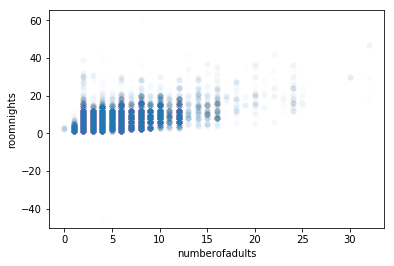

In [13]:
# roomnights vs number of adults
sns.scatterplot(x="numberofadults", y="roomnights", data=train_df, alpha=0.01,)

#### It doesen't looks like having good trend 

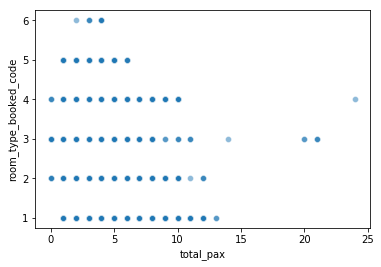

In [14]:
# room_type vs total person
sns.scatterplot(y="room_type_booked_code", x="total_pax", data=train_df, alpha=0.5)

## Summary stats of only integer datatypes 

In [15]:
train_df.describe(include="int64").transpose()

,count,mean,std,min,25%,50%,75%,max
channel_code,341424.0,1.902810,0.915311,1.0,1.0,2.0,3.0,3.0
main_product_code,341424.0,2.208738,0.823779,1.0,2.0,2.0,3.0,7.0
numberofadults,341424.0,3.275361,1.756062,0.0,2.0,3.0,4.0,32.0
numberofchildren,341424.0,0.362696,0.758019,0.0,0.0,0.0,0.0,13.0
persontravellingid,341424.0,210.288905,865.735577,45.0,45.0,45.0,45.0,4995.0
resort_region_code,341424.0,1.772960,0.750806,1.0,1.0,2.0,2.0,3.0
resort_type_code,341424.0,2.193832,1.551451,0.0,1.0,2.0,3.0,7.0
room_type_booked_code,341424.0,2.890321,0.804260,1.0,2.0,3.0,3.0,6.0
roomnights,341424.0,3.738346,2.479054,-45.0,2.0,3.0,4.0,60.0
state_code_resort,341424.0,4.763303,3.103909,1.0,2.0,5.0,7.0,13.0


In [16]:
int_cols= train_df.describe(include="int64")

print("Number of unique values attributes  are:")

for i in int_cols:
    print("{} -->{} \n {}".format(i,len(train_df[i].unique()), train_df[i].unique()))

Number of unique values attributes  are:
channel_code -->3 
 [3 1 2]
main_product_code -->5 
 [1 2 3 4 7]
numberofadults -->28 
 [ 2  4  3  8  6  7 13  5  1 10 15 11 12  9 24 16 14  0 20 32 19 18 17 23
 21 30 22 25]
numberofchildren -->12 
 [ 0  2  3  4  1  6  8  5  7 10 12 13]
persontravellingid -->6 
 [  46   47   45 4752 4753 4995]
resort_region_code -->3 
 [3 1 2]
resort_type_code -->7 
 [3 5 2 1 7 4 0]
room_type_booked_code -->6 
 [3 4 2 1 5 6]
roomnights -->44 
 [  1   5   4   2   6   3   8  12  16   9   7  10  14  15  11  22  18  25
  20  13  21  26  34  17  24  37  27  39  28 -45  19  23  29  30  36  60
  33  42  31  35  32   0  47  41]
state_code_resort -->11 
 [ 3  5  1  2  6  9 10  4 11  7 13]
total_pax -->18 
 [ 3  2  1  4  6  5  7  8  9 10 12  0 11 20 14 21 13 24]
booking_type_code -->2 
 [1 2]


### All the above Attributes i.e. int64 datatype are categorical Attributes

In [17]:
# convert int64 to categorical
#for i in int_cols:
#    train_df[i] = train_df[i].astype("category")
#    test_df[i] = test_df[i].astype("category")

In [18]:
int_cols

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,state_code_resort,total_pax,booking_type_code
count,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000
mean,1.902810,2.208738,3.275361,0.362696,210.288905,1.772960,2.193832,2.890321,3.738346,4.763303,3.193390,1.124209
std,0.915311,0.823779,1.756062,0.758019,865.735577,0.750806,1.551451,0.804260,2.479054,3.103909,1.167824,0.329821
min,1.000000,1.000000,0.000000,0.000000,45.000000,1.000000,0.000000,1.000000,-45.000000,1.000000,0.000000,1.000000
25%,1.000000,2.000000,2.000000,0.000000,45.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000
50%,2.000000,2.000000,3.000000,0.000000,45.000000,2.000000,2.000000,3.000000,3.000000,5.000000,3.000000,1.000000
75%,3.000000,3.000000,4.000000,0.000000,45.000000,2.000000,3.000000,3.000000,4.000000,7.000000,4.000000,1.000000
max,3.000000,7.000000,32.000000,13.000000,4995.000000,3.000000,7.000000,6.000000,60.000000,13.000000,24.000000,2.000000


In [19]:
# drop roomnights column

#train
train_df = train_df.drop("roomnights",1)
print(train_df.shape)

#test
test_df = test_df.drop("roomnights",1)
print(test_df.shape)

(341424, 23)
(146765, 22)


In [20]:
# Summary stats of float variables

train_df.describe(include="float64").transpose()

,count,mean,std,min,25%,50%,75%,max
season_holidayed_code,341310.0,2.673862,0.885650,1.000000,2.00000,3.000000,3.000000,4.000000
state_code_residence,336660.0,7.260708,4.701283,1.000000,4.00000,8.000000,8.000000,38.000000
amount_spent_per_room_night_scaled,341424.0,7.720801,1.090109,1.600397,7.18726,7.860814,8.419144,10.816652


In [21]:
# convert datatype to category
int_cols = train_df.describe(include="int64").columns 
float_cols =train_df.describe(include="float64").columns

cat_cols  = list(int_cols.append(float_cols[:-1]))
#cat_cols = int_cols
for i in cat_cols:
    #train_df[i]=train_df[i].astype("int64")
    train_df[i]=train_df[i].astype("category")
    test_df[i]=test_df[i].astype("category")

In [22]:
train_df.dtypes

reservation_id                                object
booking_date                          datetime64[ns]
checkin_date                          datetime64[ns]
checkout_date                         datetime64[ns]
channel_code                                category
main_product_code                           category
numberofadults                              category
numberofchildren                            category
persontravellingid                          category
resort_region_code                          category
resort_type_code                            category
room_type_booked_code                       category
season_holidayed_code                       category
state_code_residence                        category
state_code_resort                           category
total_pax                                   category
member_age_buckets                            object
booking_type_code                           category
memberid                                      

In [23]:
# Summary stats of Categorical variables
train_df.describe(include="category").transpose()

,count,unique,top,freq
channel_code,341424.0,3.0,1.0,161225.0
main_product_code,341424.0,5.0,2.0,177615.0
numberofadults,341424.0,28.0,2.0,149414.0
numberofchildren,341424.0,12.0,0.0,264250.0
persontravellingid,341424.0,6.0,45.0,267307.0
resort_region_code,341424.0,3.0,1.0,143790.0
resort_type_code,341424.0,7.0,1.0,154324.0
room_type_booked_code,341424.0,6.0,3.0,137439.0
season_holidayed_code,341310.0,4.0,2.0,126771.0
state_code_residence,336660.0,37.0,8.0,134919.0


In [24]:
# Summary stats of Categorical variables
train_df.describe(include="object").transpose()

,count,unique,top,freq
reservation_id,341424,341424,de1d0bb10240770cc6b162de7a2aa756a7936cd128e74b...,1
member_age_buckets,341424,10,D,67618
memberid,341424,101327,81c5295dd0cd56d704882cd28c7c815658ba5796165b7d...,50
cluster_code,341424,6,F,120623
reservationstatusid_code,341424,4,A,312481
resort_id,341424,32,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,35331


In [25]:
# compare resot_id from train and test, if test data has any new resot_id
x = [x for x in train_df.resort_id.unique() if x not in  test_df.resort_id.unique()]
x

[]

In [26]:
# add these cols to cat_cols and convert dtype to "category"
add_to_cat_cols = ["member_age_buckets","cluster_code","reservationstatusid_code","resort_id"  ]

for i in add_to_cat_cols:
    train_df[i] = train_df[i].astype("category")
    test_df[i] = test_df[i].astype("category")
    

train_df[add_to_cat_cols].dtypes

member_age_buckets          category
cluster_code                category
reservationstatusid_code    category
resort_id                   category
dtype: object

In [27]:
train_df.dtypes

reservation_id                                object
booking_date                          datetime64[ns]
checkin_date                          datetime64[ns]
checkout_date                         datetime64[ns]
channel_code                                category
main_product_code                           category
numberofadults                              category
numberofchildren                            category
persontravellingid                          category
resort_region_code                          category
resort_type_code                            category
room_type_booked_code                       category
season_holidayed_code                       category
state_code_residence                        category
state_code_resort                           category
total_pax                                   category
member_age_buckets                          category
booking_type_code                           category
memberid                                      

In [28]:
test_df.dtypes

reservation_id                      object
booking_date                datetime64[ns]
checkin_date                datetime64[ns]
checkout_date               datetime64[ns]
channel_code                      category
main_product_code                 category
numberofadults                    category
numberofchildren                  category
persontravellingid                category
resort_region_code                category
resort_type_code                  category
room_type_booked_code             category
season_holidayed_code             category
state_code_residence              category
state_code_resort                 category
total_pax                         category
member_age_buckets                category
booking_type_code                 category
memberid                            object
cluster_code                      category
reservationstatusid_code          category
resort_id                         category
dtype: object


### fill NAs with mode

In [29]:
train_df.isna().sum()

reservation_id                           0
booking_date                             0
checkin_date                             0
checkout_date                            0
channel_code                             0
main_product_code                        0
numberofadults                           0
numberofchildren                         0
persontravellingid                       0
resort_region_code                       0
resort_type_code                         0
room_type_booked_code                    0
season_holidayed_code                  114
state_code_residence                  4764
state_code_resort                        0
total_pax                                0
member_age_buckets                       0
booking_type_code                        0
memberid                                 0
cluster_code                             0
reservationstatusid_code                 0
resort_id                                0
amount_spent_per_room_night_scaled       0
dtype: int6

In [30]:
# fill NAs
season_holidayed_code_mode = list(train_df["season_holidayed_code"].mode())
season_holidayed_code_mode = season_holidayed_code_mode[0]

train_df["season_holidayed_code"] = train_df["season_holidayed_code"].fillna(season_holidayed_code_mode)
test_df["season_holidayed_code"] = test_df["season_holidayed_code"].fillna(season_holidayed_code_mode)

In [31]:
state_code_residence_mode = list(train_df["state_code_residence"].mode())
state_code_residence_mode = state_code_residence_mode[0]

train_df["state_code_residence"] = train_df["state_code_residence"].fillna(state_code_residence_mode)
test_df["state_code_residence"] = test_df["state_code_residence"].fillna(state_code_residence_mode)

In [32]:
train_df.isna().sum()

reservation_id                        0
booking_date                          0
checkin_date                          0
checkout_date                         0
channel_code                          0
main_product_code                     0
numberofadults                        0
numberofchildren                      0
persontravellingid                    0
resort_region_code                    0
resort_type_code                      0
room_type_booked_code                 0
season_holidayed_code                 0
state_code_residence                  0
state_code_resort                     0
total_pax                             0
member_age_buckets                    0
booking_type_code                     0
memberid                              0
cluster_code                          0
reservationstatusid_code              0
resort_id                             0
amount_spent_per_room_night_scaled    0
dtype: int64

In [33]:
# convert the "season_holidayed_code","state_code_residence" to int64 dtype to get rid of decimal point
train_df[["season_holidayed_code","state_code_residence"]] = train_df[["season_holidayed_code","state_code_residence"]].astype("int64")
# convert the "season_holidayed_code","state_code_residence" to category
train_df[["season_holidayed_code","state_code_residence"]] = train_df[["season_holidayed_code","state_code_residence"]].astype("category")

# convert the "season_holidayed_code","state_code_residence" to int64 dtype to get rid of decimal point
test_df[["season_holidayed_code","state_code_residence"]] = test_df[["season_holidayed_code","state_code_residence"]].astype("int64")
# convert the "season_holidayed_code","state_code_residence" to category
test_df[["season_holidayed_code","state_code_residence"]] = test_df[["season_holidayed_code","state_code_residence"]].astype("category")

### lets have a look at the target 

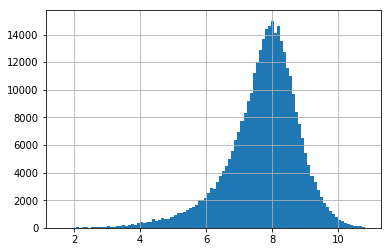

In [34]:
# histogram of amount spent
train_df.amount_spent_per_room_night_scaled.hist(bins=100)

### amount_spent_per_room_night_scaled is normally distributed

In [35]:
# extract the month of stay
#train
train_df['month'] = pd.DatetimeIndex(train_df['checkin_date']).month
#test
test_df['month'] = pd.DatetimeIndex(test_df['checkin_date']).month


In [36]:
# extract the year of stay
#train
train_df['year'] = pd.DatetimeIndex(train_df['checkin_date']).year
#test
test_df['year'] = pd.DatetimeIndex(test_df['checkin_date']).year

In [37]:
# extract the weekday of stay
#train
train_df['week_day'] = pd.DatetimeIndex(train_df['checkin_date']).weekday
#test
test_df['week_day'] = pd.DatetimeIndex(test_df['checkin_date']).weekday


In [38]:
train_df['week_day'].value_counts()

4    56621
6    53425
5    52000
0    47723
3    45002
1    43348
2    43305
Name: week_day, dtype: int64

In [39]:
train_df['year'].value_counts()

2017    87841
2018    83515
2016    82340
2015    75088
2019    12628
2012       12
Name: year, dtype: int64

In [40]:
train_df['month'].value_counts()

1     34110
5     30786
2     30167
4     30052
12    29822
3     28773
6     28479
10    27920
11    27230
7     25432
9     25026
8     23627
Name: month, dtype: int64

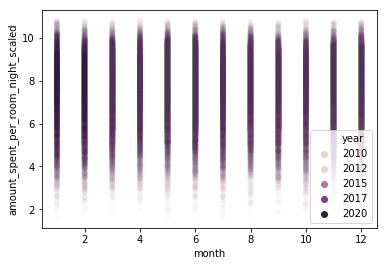

In [41]:

sns.scatterplot(x=train_df.month, y= train_df.amount_spent_per_room_night_scaled, 
                alpha=0.01, hue=train_df.year)

In [42]:
# drop "reservation_id" and "memberid" from both train and test

train = train_df.drop(["reservation_id", "memberid"],1)

test = test_df.drop(["reservation_id", "memberid"],1)

print ("shape of the data set \n train -> {} \n test -> {}".format(train.shape,test.shape))

shape of the data set 
 train -> (341424, 24) 
 test -> (146765, 23)


## Label encoding

In [43]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


In [44]:
lb_en_cols = ['resort_id','member_age_buckets','cluster_code','reservationstatusid_code']

for i in lb_en_cols:
    le.fit(train_df[i]) #fit the encoder
    train_df[i] = le.transform(train_df[i]) # transform on train
    test_df[i] = le.transform(test_df[i]) # transform on test

In [45]:
train_df.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,month,year,week_day
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,2018-04-05,2018-04-05,2018-04-06,3,1,2,0,46,3,...,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,5,2,7,7.706428,4,2018,3
1,03930f033646d073462b35d411616323597715ac4fc398...,2015-01-23,2015-04-11,2015-04-16,1,1,2,0,46,3,...,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,5,0,1,6.662563,4,2015,5
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,2015-01-28,2015-02-01,2015-02-05,1,1,2,0,47,1,...,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,4,0,9,7.871602,2,2015,6
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,2015-05-02,2015-06-11,2015-06-16,1,1,2,2,46,2,...,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,3,0,25,5.344943,6,2015,3
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,2015-09-02,2015-12-14,2015-12-19,1,1,2,0,46,2,...,5,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,3,0,25,7.059346,12,2015,0


In [46]:
# drop "reservation_id" and "memberid" from both train and test

train = train_df.drop(["reservation_id", "memberid"],1)

test = test_df.drop(["reservation_id", "memberid"],1)

print ("shape of the data set \n train -> {} \n test -> {}".format(train.shape,test.shape))

shape of the data set 
 train -> (341424, 24) 
 test -> (146765, 23)


# Linear Regression

In [47]:
# data preparation
X_train = train.drop(["amount_spent_per_room_night_scaled", 'booking_date','checkin_date','checkout_date'],1)
y = train.amount_spent_per_room_night_scaled

X_test = test.drop(['booking_date','checkin_date','checkout_date'],1)


In [48]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg,X_train,y, scoring="neg_mean_squared_error", cv=3)
rmse_scores =np.sqrt(-scores)
print("RMSE scores of 3 fold cross validation =",rmse_scores)

RMSE scores of 3 fold cross validation = [1.01786092 1.03699913 1.08913975]


###  train linear regression model

In [50]:
# train model
lin_reg.fit(X_train,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### predict on test

In [51]:
# predict on test
lin_reg_prediction = lin_reg.predict(X_test)

In [52]:
# write the predictions to csv file
lin_reg_prediction  = pd.DataFrame(lin_reg_prediction)
lin_reg_prediction.index = test_id
lin_reg_prediction.columns = ['amount_spent_per_room_night_scaled']
lin_reg_prediction.head()

,amount_spent_per_room_night_scaled
reservation_id,
7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d4787cb4596e3086b4f,7.689407
fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb1946e644b405d6233c,7.471316
540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e38f40dcb4ce0c4f552,7.459147
09593c907ae262e46f655b4db9e14f54a19eadcfdd26796a33cc98b01c6095c4,7.676480
f4c50caac68051faf37551d70bb17eebef2a20e2244cb1b2d117cd6602737ec1,7.691646


In [53]:
lin_reg_prediction.to_csv('lin_reg_prediction_2.csv')

# Random forest

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
rf_reg = RandomForestRegressor()

In [56]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_reg,X_train,y, scoring="neg_mean_squared_error", cv=3)
rmse_scores =np.sqrt(-scores)
print("RMSE scores of 3 fold cross validation =",rmse_scores)

C:\Users\dhruva\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dhruva\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dhruva\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE scores of 3 fold cross validation = [1.07716691 1.09234415 1.15548391]


### Hyperparameter Tuning

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
# select multiple hyperparameters to get best functional hypermeter
param_grid = [ { 'max_features': [2, 4, 6, 8, 10,12], 
                'n_estimators':[5,10,15], 
                'max_depth':[2,3,4,5,6]} ]

In [59]:
grid_search = GridSearchCV(rf_reg, param_grid=param_grid, cv =3,
                          scoring="neg_mean_squared_error", return_train_score=True)

In [60]:
# fit all different hypermeters combination 
grid_search.fit(X_train,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_features': [2, 4, 6, 8, 10, 12], 'n_estimators': [5, 10, 15], 'max_depth': [2, 3, 4, 5, 6]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [61]:
# Best hyperparameters
grid_search.best_params_
 

{'max_depth': 6, 'max_features': 8, 'n_estimators': 15}

In [62]:
# Best model
grid_search.best_estimator_


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=15, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

#### Checking the RMSE score of best hypermeter model using 3 fold cross validation

In [63]:
rf_reg = RandomForestRegressor(max_features=8,n_estimators= 15, max_depth= 6)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_reg,X_train,y, scoring="neg_mean_squared_error", cv=3)
rmse_scores =np.sqrt(-scores)
print("RMSE scores of 3 fold cross validation =",rmse_scores)

RMSE scores of 3 fold cross validation = [1.0160468  1.03259537 1.08756837]


## Train random forest with the best hyperparameters
#### {'max_depth': 6, 'max_features': 8, 'n_estimators': 15}

In [64]:
rf_reg = RandomForestRegressor(max_features=8,n_estimators= 15, max_depth= 6)

# train on full training data
rf_reg.fit(X_train,y)

# predict on test data
rf_reg_best_par_pred = rf_reg.predict(X_test)


In [65]:
# WRITE THE PREDICTION IN CSV
rf_reg_best_par_pred = pd.DataFrame(rf_reg_best_par_pred)
rf_reg_best_par_pred.index = test_id
rf_reg_best_par_pred.columns = ['amount_spent_per_room_night_scaled']
rf_reg_best_par_pred.head()

,amount_spent_per_room_night_scaled
reservation_id,
7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d4787cb4596e3086b4f,7.694999
fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb1946e644b405d6233c,7.759991
540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e38f40dcb4ce0c4f552,7.778276
09593c907ae262e46f655b4db9e14f54a19eadcfdd26796a33cc98b01c6095c4,7.871026
f4c50caac68051faf37551d70bb17eebef2a20e2244cb1b2d117cd6602737ec1,7.885568


In [66]:
rf_reg_best_par_pred.to_csv('rf_reg_best_par_pred.csv')